# IMDB Deep learning

## Table Of Contents:
[Introduction](#intro)

1. [Defining the problem and assembling a dataset](#wf-1)
2. [Choosing a measure of success](#wf-2)
3. [Deciding on an evaluation protocol](#wf-3)
4. [Preparing your data](#wf-4)
5. [Developing a model that does better than a baseline](#wf-5)
6. [Scaling up: developing a model that overfits](#wf-6)
7. [Regularizing your model and tuning your hyperparameters](#wf-5)

[Modular Code](#mc)
1. [Decode a review](#mc-1)
2. [Vectorize Sequences](#mc-2)
3. [Plot Training and validation loss ](#mc-3)
4. [Plot Training and validation accuracy ](#mc-4)

## Introduction <a class="anchor" id="intro"></a>

The IMDB dataset, a publicly available collection of movie reviews, has been extensively utilized in machine learning research endeavors. In line with this tradition, this report will delve into the methodologies and analyses required to construct a deep learning algorithm. Drawing inspiration from the workflow outlined in the book "Deep Learning with Python," this report will navigate through the intricacies of algorithm creation, optimization techniques, and exploration of various hyperparameters. Subsequently, a thorough examination of the obtained results will be conducted, shedding light on the strengths and weaknesses inherent in this workflow.

## 1 Defining the problem and assembling a dataset <a class="anchor" id="wf-1"></a>

This report aims to develop a deep neural network designed to classify the sentiment of movie reviews as either positive or negative, thus framing the problem as a binary classification task. The IMDB dataset is chosen as an ideal candidate for this study due to its comprehensive collection of 50,000 movie reviews. The dataset is readily available within the Keras framework, and the `load_data(num_words=testSampleSize)` method simplifies the preprocessing of the dataset by performing the following steps:

- Each review is represented as a sequence of word indices, where each word in the review is mapped to a unique integer index.

- The most frequently occurring words are selected to create a vocabulary of a specified size. Words outside this vocabulary are discarded or replaced with a special token.

- We specify `num_words=10000` to limit the vocabulary size to the 10,000 most frequently occurring words in the dataset.

- The dataset is split into training and testing sets. By default, the split ratio is 50% for training and 50% for testing.

- The sentiment labels associated with each review are encoded as integers: 0 for negative reviews and 1 for positive reviews.

- The function returns two tuples:

    - `(train_data, train_labels)`: Training data and labels, shape Vector.
    - `(test_data, test_labels)`: Testing data and labels, shape Vector.

### Importing the dataset

In [1]:
# Import IMDB from Keras
from tensorflow.keras.datasets import imdb

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


### Visualizing the dataset

In [16]:
# Display the shape of the training and testing datasets
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", test_labels.shape)

# Display a sample review and its corresponding label
print("\nSample review:", train_data[0])  # The review is represented as a list of word indices
print("\nSample english review:", decode_review(train_data[0]))
print("\nSample label:", train_labels[0])  # 0 indicates a negative review, 1 indicates a positive review

Training data shape: (25000,)
Training labels shape: (25000,)
Testing data shape: (25000,)
Testing labels shape: (25000,)

Sample review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38,

## 2 Choosing a measure of success <a class="anchor" id="wf-2"></a>

TO DO: Why choose Accuary, 

For the IMDB dataset, where the task is binary classification of movie reviews as either positive or negative sentiment, several measures of success can be considered:

1. **Accuracy**: This measures the proportion of correctly classified reviews (both positive and negative) out of the total number of reviews.

2. **Precision and Recall**: These measures are useful when dealing with imbalanced datasets. Precision measures the proportion of correctly predicted positive reviews out of all predicted positive reviews, while recall measures the proportion of correctly predicted positive reviews out of all actual positive reviews.

3. **Area Under the Receiver Operating Characteristic Curve (ROC AUC)**: This metric is suitable for balanced-classification problems and evaluates the model's ability to discriminate between positive and negative reviews across different thresholds.

4. **F1-Score**: This is the harmonic mean of precision and recall and is useful when you want to balance precision and recall.

The choice of measure depends on your specific objectives and priorities. If you aim to have a balanced prediction performance across both positive and negative reviews, accuracy or F1-score might be suitable. If the dataset is imbalanced, precision and recall could provide a better assessment of model performance. If you are interested in the model's ability to rank reviews based on sentiment, mean average precision could be considered.


## 3 Deciding on an evaluation protocol <a class="anchor" id="wf-3"></a>

For the IMDB dataset, which contains a substantial amount of data (50,000 movie reviews), maintaining a hold-out validation set would be an appropriate evaluation protocol. This approach involves splitting the dataset into a training set and a validation set, with the training set used to train the model and the validation set used to evaluate its performance.

Since the dataset is sufficiently large, this protocol allows for reliable evaluation without the need for more computationally expensive techniques like K-fold cross-validation or iterated K-fold validation. Therefore, maintaining a hold-out validation set would be a practical and effective choice for evaluating models trained on the IMDB dataset.

## 4 Preparing your data <a class="anchor" id="wf-4"></a>

In preparation for training a deep neural network, the data undergoes formatting to ensure compatibility with the model architecture. This involves transforming the raw data into a structured format known as a Tensor, which serves as the fundamental data structure for input into neural networks. Since we are planning to utilize a Dense layer in our neural network, it requires input data in the form of a two-dimensional matrix, also known as a tensor of rank two. However, our initial data is in the form of a one-dimensional array, often referred to as a vector. Consequently, we must transform the vector into a two-dimensional array to meet the input requirements of the Dense layer. This formatting step ensures that the data is properly organized and ready for further processing and training within the neural network model.

There are two approaches when preprocessing sentiment data. The first involves padding lists, where every review is standardized to a fixed length by adding zeros. The second approach is one-hot encoding, where each review is represented as an array of zeros and ones, with each index corresponding to a specific word in the vocabulary. In this report, one-hot encoding will be utilized as the data representation method for several reasons:

1. **Sparse Representation**: One-hot encoding represents each word as a binary vector with a single '1' and many '0's. This sparse representation is memory efficient, especially when dealing with large vocabularies, as it only requires storage for the active indices.

2. **Independence of Word Indices**: One-hot encoding treats each word index as independent of others. This independence can be beneficial when modeling semantic relationships between words is not a priority for the task at hand. For example, in sentiment analysis, the presence of specific words rather than their relationships may be more important.

3. **Compatibility with Dense Layer**: One-hot encoded vectors can be directly fed into a Dense layer, which is a common choice for the initial layer in neural networks. Dense layers are capable of handling floating-point vector data, making them compatible with one-hot encoded input.

4. **Ease of Implementation**: One-hot encoding is straightforward to implement and widely supported by machine learning libraries, including TensorFlow and Keras. It does not require additional preprocessing steps beyond converting word indices to binary vectors.

5. **Applicability to Text Classification Tasks**: For tasks such as text classification, where the goal is to predict a single label or category for each input, one-hot encoding is a suitable choice. It provides a clear representation of input data that can be easily interpreted by the model.

In addition to its structure, every neural network model requires input data to consist solely of numerical values within the range of zero to one. Normalization serves as the essential process for achieving this, as it transforms and scales the data to fit within this desired range. In this context, one hot encoding effectively incorporates the normalization step into the data preprocessing pipeline. Consequently, additional preprocessing steps are not required. By employing one hot encoding, we seamlessly integrate normalization into the data preparation process, ensuring that the input data adheres to the neural network model's requirements without the need for further preprocessing.

Once the data has been transformed into a vector shape, it becomes suitable for input into a neural network. In our specific case, both the training and testing data take on a shape of (25000, 10000). This shape can be interpreted as follows: there are 25000 reviews in total, and each review is represented as a vector of 10000 entries consisting of zeros and ones. Each entry corresponds to a word in a predefined dictionary. In the subsequent section, I will develop a basic model designed to surpass the initial level of statistical power.

### Preprocess

In [4]:
import numpy as np

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Visualizing the Preprocessing

In [18]:
# Display the shape of the training and testing datasets
print("Training data rank:", x_train.ndim)
print("Testing data rank:", x_test.ndim)
print("Training labels rank:", y_train.ndim)
print("Testing labels rank:", y_test.ndim)
print("\nTraining data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)
print("\nTraining sample:", x_train[0])
print("Testing sample:", x_test[0])
print("Training label:", y_train[0])
print("Testing label:", y_test[0])

Training data rank: 2
Testing data rank: 2
Training labels rank: 1
Testing labels rank: 1

Training data shape: (25000, 10000)
Testing data shape: (25000, 10000)
Training labels shape: (25000,)
Testing labels shape: (25000,)

Training sample: [0. 1. 1. ... 0. 0. 0.]
Testing sample: [0. 1. 1. ... 0. 0. 0.]
Training label: 1.0
Testing label: 0.0


## 5 Developing a model that does better than a baseline <a class="anchor" id="wf-5"></a>

In developing a model that outperforms a baseline, several key considerations come into play. First and foremost, achieving statistical power is essential, especially when dealing with classification tasks like the IMDB example, where anything above an accuracy of 0.5 indicates an improvement over random guessing. This underscores the hypothesis that the model's outputs can indeed be predicted based on the inputs provided, and that the available data contains sufficient information to learn the underlying relationship between inputs and outputs. Therefore, the base model will follow the following key choices:

**Last Layer activation** For the baseline, I've opted for the hyperparameters recommended by the Deep Learning with Python (DLWP) book, which include using the `sigmoid` function as the activation function for the final layer. Employing the sigmoid function is appropriate in this scenario because it yields the probability of each sample. This choice aligns with the goal of the example and facilitates the interpretation of the model's predictions in terms of probabilities.

**Loss Function** The selection of a suitable loss function that corresponds to the problem type is crucial. In the context of IMDB classification, `binary_crossentropy` was chosen due to its effectiveness in scenarios where the objective is to discern between two classes, typically represented by the probabilities ranging from 0 to 1. Conversely, regression tasks often utilize the mean squared error (MSE) loss function, particularly when the goal is to predict continuous values. It's important to tailor the choice of loss function to the specific requirements and characteristics of the problem at hand to optimize model performance effectively.

**Optimization configuration** Optimizing the model's configuration involves decisions regarding the choice of optimizer, such as `rmsprop`, and tuning its learning rate, with default values often serving as a reliable starting point for experimentation and refinement.

### Baseline Model

In [20]:
# model
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train
history = model.fit(x_train,
                    y_train,
                    batch_size = 512) 

49/49 [==============================] - 5s 102ms/step - loss: 0.4600 - accuracy: 0.8269


### Evaluation of the testing data with the baseline model

In [22]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 13s 16ms/step - loss: 0.3654 - accuracy: 0.8647


### Results

Having achieved statistical power by surpassing a threshold of 0.5 with an accuacy of 0.8647, we confirm that our model performance exceeds a random baseline, validating the predictive capabilities of the IMDB dataset. However, our journey doesn't end here; there is still room for refinement and optimization to unlock the full potential of our model. It is noteworthy that our model's accuracy improves even further when presented with new, unseen data, highlighting its robustness and generalization capabilities. This underscores the importance of ongoing model adjustments and enhancements to maximize its effectiveness in real-world scenarios.



## 6 Scaling up: developing a model that overfits <a class="anchor" id="wf-6"></a>

### Model 1

In [16]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 9s 283ms/step - loss: 0.5379 - accuracy: 0.7883 - val_loss: 0.4091 - val_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 7s 227ms/step - loss: 0.3244 - accuracy: 0.8973 - val_loss: 0.3161 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 8s 273ms/step - loss: 0.2345 - accuracy: 0.9216 - val_loss: 0.2824 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 6s 206ms/step - loss: 0.1820 - accuracy: 0.9425 - val_loss: 0.2782 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 6s 190ms/step - loss: 0.1470 - accuracy: 0.9522 - val_loss: 0.2787 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 6s 193ms/step - loss: 0.1197 - accuracy: 0.9627 - val_loss: 0.2909 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 6s 204ms/step - loss: 0.1018 - accuracy: 0.9694 - val_loss: 0.3057 - val_accuracy: 0.8837
Epoch 

In [17]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.7958 - accuracy: 0.8469


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

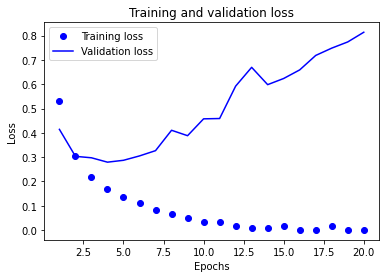

In [19]:
plot_loss()

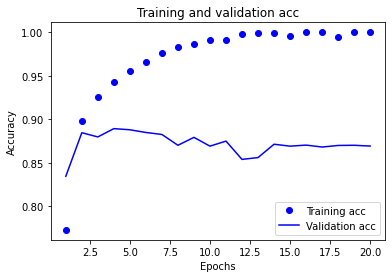

In [15]:
plot_accuary()

### Model 2

In [24]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# train
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val)) 

Epoch 1/20
30/30 [==============================] - 8s 280ms/step - loss: 0.4869 - accuracy: 0.7957 - val_loss: 0.3667 - val_accuracy: 0.8764
Epoch 2/20
30/30 [==============================] - 6s 207ms/step - loss: 0.2957 - accuracy: 0.9075 - val_loss: 0.3054 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 6s 187ms/step - loss: 0.2241 - accuracy: 0.9285 - val_loss: 0.2961 - val_accuracy: 0.8836
Epoch 4/20
30/30 [==============================] - 6s 207ms/step - loss: 0.1811 - accuracy: 0.9424 - val_loss: 0.2790 - val_accuracy: 0.8871
Epoch 5/20
30/30 [==============================] - 6s 193ms/step - loss: 0.1535 - accuracy: 0.9519 - val_loss: 0.2739 - val_accuracy: 0.8903
Epoch 6/20
30/30 [==============================] - 6s 197ms/step - loss: 0.1300 - accuracy: 0.9603 - val_loss: 0.2806 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 6s 193ms/step - loss: 0.1107 - accuracy: 0.9681 - val_loss: 0.2933 - val_accuracy: 0.8838
Epoch 

In [25]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 9s 12ms/step - loss: 0.6280 - accuracy: 0.8474


In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
print(np.argmin(history_dict['val_loss']), "epochs")

4 epochs


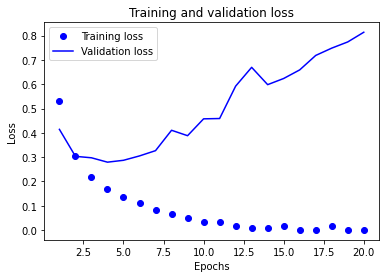

In [27]:
plot_loss()

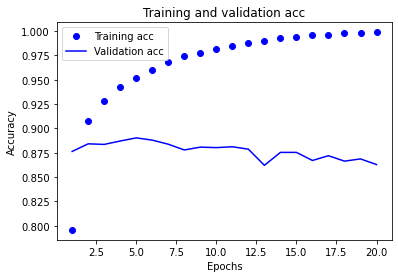

In [28]:
plot_accuary()

## 7 Regularizing your model and tuning your hyperparameters <a class="anchor" id="wf-7"></a>

In [23]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 9s 190ms/step - loss: 0.4740 - accuracy: 0.8108
Epoch 2/4
49/49 [==============================] - 8s 155ms/step - loss: 0.2719 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 7s 137ms/step - loss: 0.2081 - accuracy: 0.9282
Epoch 4/4
49/49 [==============================] - 5s 100ms/step - loss: 0.1727 - accuracy: 0.9394


In [21]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 9s 12ms/step - loss: 0.3035 - accuracy: 0.8808


In [31]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
49/49 [==============================] - 10s 200ms/step - loss: 0.4279 - accuracy: 0.8306
Epoch 2/5
49/49 [==============================] - 8s 159ms/step - loss: 0.2551 - accuracy: 0.9120
Epoch 3/5
49/49 [==============================] - 8s 159ms/step - loss: 0.2028 - accuracy: 0.9290
Epoch 4/5
49/49 [==============================] - 7s 143ms/step - loss: 0.1724 - accuracy: 0.9392
Epoch 5/5
49/49 [==============================] - 6s 114ms/step - loss: 0.1515 - accuracy: 0.9474


In [30]:
# evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 9s 12ms/step - loss: 0.3249 - accuracy: 0.8694 1s - loss: 0.3232 - ac






## Results

## Evaluation

## Conclusion

## Modular code <a class="anchor" id="mc"></a>

### Decode a review <a class="anchor" id="mc-1"></a>

In [14]:
# Load the word index mapping
word_index = imdb.get_word_index()

# Reverse the word index mapping to map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Decode a review from its list of word indices to text
def decode_review(review):
    # Decodes the review using the reverse word index mapping
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in review])

1646592/1641221 [==============================] - 0s 0us/step


### Vectorize Sequences <a class="anchor" id="mc-2"></a>

In [3]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

### Plot Training and validation loss <a class="anchor" id="mc-3"></a>

In [12]:
import matplotlib.pyplot as plt

def plot_loss():
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')           
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

### Plot training and validation accuracy <a class="anchor" id="mc-4"></a>

In [14]:
import matplotlib.pyplot as plt

def plot_accuary():
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    epochs = range(1, len(acc) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, acc, blue_dots, label = 'Training acc')
    plt.plot(epochs, val_acc, solid_blue_line, label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()